In [1]:
from matplotlib import pyplot as plt
from pyopenms import *
import matplotlib.patches as mpatches
exp = MSExperiment()
#Load mzML file and store it in MSExperiment
MzMLFile().load("E:\level 4\margo\MZml/AA7_082319_03.mzML",exp)
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("E:\level 4\margo\MZml/AA7_082319_03.mzML","E:\level 4\margo\Fasta/Pr395_GFP_IP_GFP_fs_mutant.fasta", protein_ids, peptide_ids)

for peptide_id in peptide_ids:
# Peptide identification values
    print(35*"=")
    print("Peptide ID m/z:", peptide_id.getMZ())
    print("Peptide ID rt:", peptide_id.getRT())
    print("Peptide scan index:", peptide_id.getMetaValue("scan_index"))
    print("Peptide ID score type:", peptide_id.getScoreType())

# PeptideHits
for Peptide in peptide_id.getHits():
    print(" - Peptide hit sequence:", Peptide.getSequence())
    mz = Peptide.getSequence().getMonoWeight(Residue.ResidueType.Full, Peptide.getCharge()) / Peptide.getCharge()
    print(" - Peptide hit monoisotopic m/z:", mz)
    score=mz/peptide_id.getMZ()
    print("comparsion score = ", score)
    a = str(Peptide.getSequence())
    tsg = TheoreticalSpectrumGenerator()
    spec1 = MSSpectrum()
    peptide = AASequence.fromString(a)
    p = Param()
    p.setValue("add_b_ion", "true")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1, peptide, 1, 2)
    print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
    tsg1 = TheoreticalSpectrumGenerator()
    theo_spectrum = MSSpectrum()
    p = tsg1.getParameters()
    experiment_spectrum = exp.getSpectrum(peptide_id.getMetaValue("scan_index"))
    p.setValue("add_y_ions", "true")
    p.setValue("add_b_ions", "true")
    p.setValue("add_metainfo", "true")
    tsg1.setParameters(p)
    peptide = AASequence.fromString(a)
    tsg1.getSpectrum(theo_spectrum, peptide, 1, 2)
    #Spectrum
    filtered = MSExperiment()
    for s in exp:
        if s.getMSLevel() == 2:
            filtered.addSpectrum(s)

    def plotSpectrun(index):
        fig = plt.subplots(figsize =(5, 4))
        FirstSpectra = exp[index]
        mz, intensity = FirstSpectra.get_peaks()
        p = plt.bar(mz, intensity,snap=True,color ="r")
        plt.title("MS level :" + str(FirstSpectra.getMSLevel()))
        plt.ylabel('Intensity')
        plt.xlabel('m/z')
        plt.show()
    plotSpectrun(2)



Peptide ID m/z: 758.357116699219
Peptide ID rt: 906.08980000002
Peptide scan index: 2203
Peptide ID score type: hyperscore
Peptide ID m/z: 741.853515625
Peptide ID rt: 983.17969999998
Peptide scan index: 2490
Peptide ID score type: hyperscore
Peptide ID m/z: 727.84912109375
Peptide ID rt: 1085.0374999999801
Peptide scan index: 2836
Peptide ID score type: hyperscore
Peptide ID m/z: 740.851745605469
Peptide ID rt: 1448.57329999998
Peptide scan index: 4186
Peptide ID score type: hyperscore
Peptide ID m/z: 750.846374511719
Peptide ID rt: 1466.23039999998
Peptide scan index: 4250
Peptide ID score type: hyperscore
Peptide ID m/z: 720.338562011719
Peptide ID rt: 1625.51719999998
Peptide scan index: 4928
Peptide ID score type: hyperscore
Peptide ID m/z: 733.852966308594
Peptide ID rt: 1646.22829999998
Peptide scan index: 5013
Peptide ID score type: hyperscore
Peptide ID m/z: 740.861083984375
Peptide ID rt: 1674.8221000000199
Peptide scan index: 5122
Peptide ID score type: hyperscore
Peptide ID

Number of matched peaks: 21
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
b6++	2	297.141236969771	297.0179443359375
y3+	1	363.18742829617105	363.60589599609375
b4+	1	389.18531908997096	389.1186218261719
b9++	2	467.702388272821	468.0811767578125
y9++	2	527.258582615171	527.1473999023438
b11++	2	560.752609996121	561.249267578125
b12++	2	617.294642171571	617.418212890625
y11++	2	649.3191718703711	649.4638671875
y12++	2	677.829903918221	677.5708618164062
b7+	1	690.3279616960709	690.2216796875
y13++	2	728.353743529871	728.2429809570312
b14++	2	741.3526889267711	740.9769897460938
y14++	2	756.864475577721	756.5180053710938
b15++	2	798.8661610065211	799.1712646484375
b8+	1	819.3705559193709	819.2940673828125
y8+	1	924.467294540271	924.3240966796875
b9+	1	934.3975000788708	934.3731689453125
y9+	1	1053.509888763571	1053.5537109375
b11+	1	1120.4979435254709	1120.522705078125
y10+	1	1150.5626529868712	1150.6448974609375
y12+	1	1354.652531369671

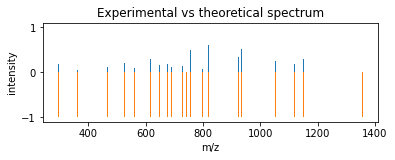

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] # relative intenstiy
    theo_int = [element * -1 for element in theo_int] # invert the intensity for the mirror plot
    #plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')

obs_mz, obs_int = experiment_spectrum.get_peaks()

# We filter the peaks of the theoretical spectrum to fit the range (to reduce image complexity)
theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= 200.0 and mz <= 800.0:
        theo_mz.append(mz)
        theo_int.append(intensity)



alignment = []
spa = SpectrumAlignment()
p = spa.getParameters()
    # use 0.5 Da tolerance (Note: for high-resolution data we could also use ppm by setting the is_relative_tolerance value to true)
p.setValue("tolerance", 0.5)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
    # align both spectra
spa.getSpectrumAlignment(alignment, theo_spectrum, experiment_spectrum)
print("Number of matched peaks: " + str(len(alignment)))
print("ions"+"      "+"theoretical. m/z"+"      "+"experimental m/z")
print(50*"-")


for theo_idx, obs_idx in alignment:
    ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
    ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
          + str(theo_spectrum[theo_idx].getMZ())
          + "\t" + str(experiment_spectrum[obs_idx].getMZ()))
b=str(peptide_id.getMetaValue("scan_index"))
print(a)

theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment:
    theo_mz.append(theo_spectrum[theo_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
    obs_mz.append(experiment_spectrum[obs_idx].getMZ())
    obs_int.append(experiment_spectrum[obs_idx].getIntensity())
plt.subplot(2, 1, 1)
    # make range form 300 to 1000 to see the simialrity
title = 'Experimental vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)  
   

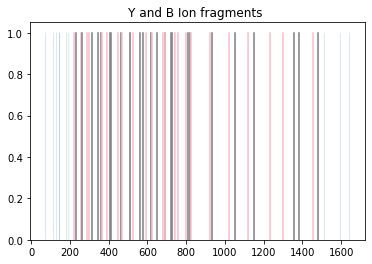

In [3]:
#y and b fragments
mz,i = spec1.get_peaks() 
plt.title("Y and B Ion fragments ")
count = 0
idx=0
annot = spec1.getStringDataArrays()[0]
bars = plt.bar(mz, i, snap=False)
for mz, i in zip(*theo_spectrum.get_peaks()):
    if mz >= 200 and mz <= 1500:
        if 'y' in theo_spectrum.getStringDataArrays()[0][count].decode():
          
            plt.plot([mz, mz], [0, i], snap=True, color="r")

            count = count + 1
        else:
            plt.plot([mz, mz], [0, i], snap=True, color="b")
                

            count = count + 1

plt.ylim(bottom=0)
plt.show()


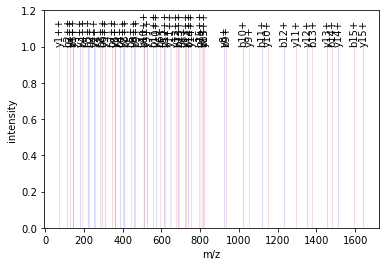

In [4]:
#can try another way
mz,i = spec1.get_peaks() 
annot = spec1.getStringDataArrays()[0] 
bars =plt.bar(spec1.get_peaks()[0], spec1.get_peaks()[1], snap=False,color =("r","b"),)
count=0
for rect in bars: 
    height = rect.get_height() 
    if "y" in annot[count].decode():
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[count].decode(), ha='center', va='bottom', rotation=90, snap=True)
    else :
         plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[count].decode(), ha='center', va='bottom', rotation=90,snap=True) 
    idx += 1 
    count+=1
    plt.ylim(top=1.2) 
    plt.xlabel("m/z") 
    plt.ylabel("intensity")

In [2]:
#Proteolytic Digestion with Trypsin
from pyopenms import *
import matplotlib.pyplot as plt
import numpy as np
dig = ProteaseDigestion()
dig.getEnzymeName()
entries=[]
f=FASTAFile()
f.load("E:\level 4\margo\Fasta/Pr395_GFP_IP_GFP_fs_mutant.fasta",entries)
c=0
while c<len(entries)-1:
    f=AASequence.fromString(entries[c].sequence)
    print("sequence: ",c)
    result = []
    dig.digest(f, result)
    for e in result:
        print(e.toString())
    print(len(result)) 
    c=c+1
lis=[]
peptides=[AASequence.fromString(s.toString()) for s in result]
for peptide in peptides:
    tsg=TheoreticalSpectrumGenerator()
    spec1=MSSpectrum()
    p=Param()
    p.setValue("add_b_ions","true")
    p.setValue("add_y_ions","true")
    p.setValue("add_metainfo","true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1,peptide,1,1)
    lis.append(spec1)
    print("Spectrum 1 of",peptide,"has",lis[0].size(),"peaks")
  
  

sequence:  0
MGKPIPNPLLGLDSTGGGKPIPNPLLGLDSTGGTEMSFLSSEVLVGDLMSPFDPSGLGAEESLGLLDDYLEVAK
HFKPHGFSSDK
AK
AGSSEWLAVGGYGER
R
ERPAR
HGDR
VPHHR
HPER
R
GVR
AGGR
R
R
GHPR
AGPHDQQDEEHQR
RPDLQPLPAEPR
DGLR
LLPLR
HLPQR
LR
EPLPAR
HQQR
R
LHQHPHR
EVR
GR
R
R
AAR
ELQLPLR
GRPR
DR
R
LQGDGHR
LPR
GQR
DLHR
QDHPQQR
HR
GAPAPHGR
41
sequence:  1
MGKPIPNPLLGLDSTGGGKPIPNPLLGLDSTGGTEMSFLSSEVLVGDLMSPFDPSGLGAEESLGLLDDYLEVAK
HFKPHGFSSDK
AK
AGSSEMAR
CR
R
IWR
ATR
AACPPWR
SSAASPAP
10
sequence:  2
MGKPIPNPLLGLDSTGGGKPIPNPLLGLDSTGGTEMSFLSSEVLVGDLMSPFDPSGLGAEESLGLLDDYLEVAK
HFKPHGFSSDK
AK
AGSSENGSLSEDMESDESGLPAMEIECR
ITGTLNGVEFELVGGGEGTPEQGR
MTNK
MK
STK
GALTFSPYLLSHVMGYGFYHFGTYPSGYENPFLHAINNGGYTNTR
IEK
YEDGGVLHVSFSYR
YEAGR
VIGDFK
VMGTGFPEDSVIFTDK
IIR
SNATVEHLHPMGDNDLDGSFTR
TFSLR
DGGYYSSVVDSHMHFK
SAIHPSILQNGGPMFAFR
R
VEEDHSNTELGIVEYQHAFK
TPDADAGEE
22
sequence:  3
MGKPIPNPLLGLDSTGGGKPIPNPLLGLDSTGGTEMSFLSSEVLVGDLMSPFDPSGLGAEESLGLLDDYLEVAK
HFKPHGFSSDK
AK
AGSSEGSLSEDMESDESGLPAMEIECR
ITGTLNGVEFELVGGGEGTPEQGR
MTNK
MK
STK
GALTFSPYL

In [1]:
from matplotlib import pyplot as plt
from pyopenms import *
import matplotlib.patches as mpatches
exp = MSExperiment()
#Load mzML file and store it in MSExperiment
MzMLFile().load("E:\level 4\margo\MZml/AA7_082319_03.mzML",exp)
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("E:\level 4\margo\MZml/AA7_082319_03.mzML","E:\level 4\margo\Fasta/Pr395_GFP_IP_GFP_fs_mutant.fasta", protein_ids, peptide_ids)

for peptide_id in peptide_ids:
# Peptide identification values
    print(35*"=")
    print("Peptide ID m/z:", peptide_id.getMZ())
    print("Peptide ID rt:", peptide_id.getRT())
    print("Peptide scan index:", peptide_id.getMetaValue("scan_index"))
    print("Peptide ID score type:", peptide_id.getScoreType())
  #Show all Data in peptides
    for hit in peptide_id.getHits():
        print(" - Peptide hit sequence:", hit.getSequence())
        mz = hit.getSequence().getMonoWeight(Residue.ResidueType.Full, hit.getCharge()) / hit.getCharge()
        print(" - Peptide hit monoisotopic m/z:", mz)
        score=mz/peptide_id.getMZ()
        print("comparsion score = ", score)
        a = str(hit.getSequence())
        tsg = TheoreticalSpectrumGenerator()
        spec1 = MSSpectrum()
        peptide = AASequence.fromString(a)
        p = Param()
        p.setValue("add_b_ion", "true")
        p.setValue("add_metainfo", "true")
        tsg.setParameters(p)
        tsg.getSpectrum(spec1, peptide, 1, 2)
        tsg1 = TheoreticalSpectrumGenerator()
        theo_spectrum = MSSpectrum()
        p = tsg1.getParameters()
        p.setValue("add_y_ions", "true")
        p.setValue("add_b_ions", "true")
        p.setValue("add_metainfo", "true")
        experiment_spectrum = exp.getSpectrum(peptide_id.getMetaValue("scan_index"))
        tsg1.setParameters(p)
        peptide = AASequence.fromString(a)
        tsg1.getSpectrum(theo_spectrum, peptide, 1, 2)
        print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
        alignment = []
        spa = SpectrumAlignment()
        p = spa.getParameters()
    # use 0.5 Da tolerance (Note: for high-resolution data we could also use ppm by setting the is_relative_tolerance value to true)
        p.setValue("tolerance", 0.5)
        p.setValue("is_relative_tolerance", "false")
        spa.setParameters(p)
    # align both spectra
        spa.getSpectrumAlignment(alignment, theo_spectrum, experiment_spectrum)
        print("Number of matched peaks: " + str(len(alignment)))
        print("ions"+"      "+"theoretical. m/z"+"      "+"experimental m/z")
        print(50*"-")
        for theo_idx, obs_idx in alignment:
            ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
            ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
            print(ion_name + "\t" + str(ion_charge) + "\t"
                  + str(theo_spectrum[theo_idx].getMZ())
                  + "\t" + str(experiment_spectrum[obs_idx].getMZ()))


Peptide ID m/z: 758.357116699219
Peptide ID rt: 906.08980000002
Peptide scan index: 2203
Peptide ID score type: hyperscore
 - Peptide hit sequence: AGSSEYLAVGGYGER
 - Peptide hit monoisotopic m/z: 758.357349029871
comparsion score =  1.0000003063604823
Spectrum 1 of AGSSEYLAVGGYGER has 54 peaks.
Number of matched peaks: 2
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
b9+	1	878.425429348871	878.7120361328125
y11+	1	1213.584785018771	1214.0189208984375
Peptide ID m/z: 741.853515625
Peptide ID rt: 983.17969999998
Peptide scan index: 2490
Peptide ID score type: hyperscore
 - Peptide hit sequence: AGSSEELAVGGYGER
 - Peptide hit monoisotopic m/z: 741.3469814979709
comparsion score =  0.9993172046551503
Spectrum 1 of AGSSEELAVGGYGER has 54 peaks.
Number of matched peaks: 26
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
b2+	1	129.065854721971	129.05210876464844
y1+	1	175.118952913371	175

Number of matched peaks: 22
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
y8++	2	404.701036812121	404.819985478823
b9++	2	415.698160344021	415.72033461407705
b5+	1	432.17250726427096	432.17198557266096
b10++	2	444.208892391871	444.20949951804283
y9++	2	461.243068987571	461.2429266985393
b11++	2	472.71962443972103	472.7190360267798
y10++	2	518.756541067321	518.756376168722
y4+	1	524.246340519471	524.272793404685
b6+	1	547.1994514237709	547.2474571003246
b12++	2	554.251289083271	554.2582172887556
y5+	1	581.2678046151709	581.2853138152337
b13++	2	582.762021131121	582.3502804223923
y11++	2	583.277838178971	583.3007146129705
y12++	2	626.7938527587211	626.7944390260838
y6+	1	638.2892687108709	638.2896411189917
b14++	2	647.283318242771	647.2840113593484
b7+	1	660.283515774671	659.8772621371236
y13++	2	670.3098673384711	670.3123179358194
y14++	2	698.8205993863211	698.9423258208443
b8+	1	731.3206299341709	731.4223045455324
y7+	1	737.35768299

Spectrum 1 of AGSSEQLAVGGYGER has 54 peaks.
Number of matched peaks: 32
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
y3++	2	181.09514384957103	181.249267578125
b3+	1	216.09788388147098	216.04129028320312
y4++	2	262.626808493121	263.0728454589844
b6++	2	280.619180993121	280.17578125
b4+	1	303.12991304097096	303.2059326171875
y2+	1	304.161547136671	304.09869384765625
y6++	2	319.648272588821	319.22088623046875
b7++	2	337.161213168571	337.239990234375
y3+	1	361.18301123237103	361.23193359375
y7++	2	369.182479732371	369.07171630859375
y8++	2	404.701036812121	405.1669921875
b9++	2	422.213977391871	421.9052734375
b5+	1	432.17250726427096	432.22412109375
b10++	2	450.72470943972104	451.17938232421875
b11++	2	479.23544148757105	479.18707275390625
y4+	1	524.246340519471	524.177978515625
b6+	1	560.231085519471	560.3868408203125
y5+	1	581.2678046151709	581.3236694335938
b13++	2	589.277838178971	589.4505004882812
y6+	1	638.2892687108709	638.5443